In [2]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
# user-defined

from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.integrate import solve_ivp

import scipy as sp
from scipy.optimize import root,bisect

import copy

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

# Definitions

## Circle map

The circle map is given by

$$\theta_{n+1} = \theta_n + \Omega + \frac{K}{2\pi}\sin(2\pi \theta_n)$$

where $\theta_n$ is taken $\mod 1$. I'm interested in the continuous version on $\mod{2\pi}$:

$$\theta' = \Omega' + K\sin(\theta),$$

where $\Omega' = 2\pi\Omega$.

## Full rhs

In [62]:
# this form is from Childs and Strogatz 2008
def rhs_full(t,y,del1,eps,omf):
    out1 
    return del1 + eps*np.sin(omf*t-y)

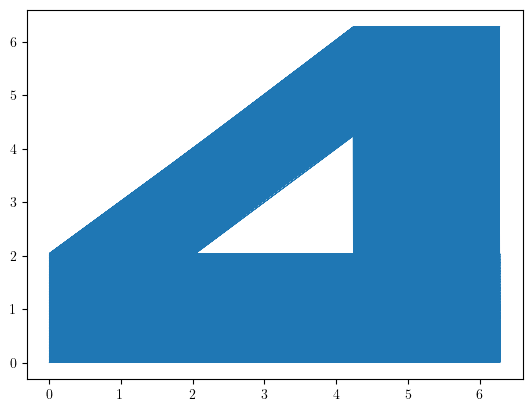

In [70]:
t = np.arange(0,10000,.01)
sol = solve_ivp(rhs_full,[t[0],t[-1]],[0],t_eval=t,atol=1e-8,rtol=1e-8,method='LSODA',args=(1,.02,2))

fig,axs = plt.subplots()
axs.plot(np.mod(t,2*np.pi),np.mod(sol.y.T[:,0],2*np.pi),lw=.5)

In [37]:
print(sol.y.T[-1]/t[-1])

[0.66666667]


## Reduced rhs

To formulate the same problem in terms of the n:m strong coupling method, we view the forcing function as having phase $\theta_Y$ satisfying

$\theta_Y' = \omega_f + \delta,$

where $\omega_f$ is (by default) a multiple of $m$ and $\delta$ alters the forcing frequency. We let $\Omega' = \omega/\omega_f = n/m$, then we may study $n:m$ phase-locking using the circle map within the proposed framework.

To start, we subtract the moving frames $\hat\theta = \theta - \Omega' \theta_Y$ and $\hat\theta_Y = \theta_Y - \omega_f t$. Then the equations become

$$\begin{align}
\hat\theta' &= K \sin(\hat\theta + \Omega' t),\\
\hat\theta_Y &= \delta
\end{align}$$

We then average the right-hand side over $m$ periods. The calculations are straightforward if we note that the right-hand side of $\hat\theta$ is odd, so any integral on a $2\pi m$-periodic domain will be zero. Thus, the phase difference is given by

$\hat\theta - \hat\theta_Y = \delta$.

$$\hat\theta' = K [\sin(\hat\theta)\cos(\Omega' t) + \cos(\hat\theta)\sin(\Omega't)].$$

Then averaging:

$$\begin{align*}
\hat\theta' &= K \int_0^{2\pi m}[\sin(\hat\theta)\cos(\Omega' t) + \cos(\hat\theta)\sin(\Omega't)] dt\\
&= K [\sin(\hat\theta)\int_0^{2\pi m}\cos(\Omega' t) + \cos(\hat\theta)\int_0^{2\pi m}\sin(\Omega't)] dt
\end{align*}$$

In [7]:
def ct_redu(t,y,eps,del1):
    h = eps*sin
    h += del1
    return h

In [8]:
def ct_full(t,y,eps,pd1,pd2,del1):
    out1 = rhs_cgl(t,y,pd1,'val',0) + eps*c1.coupling_cgl([*y,system2(t,del1)],pd2,'val',1)
    return np.array(list(out1))

## Phase-locking existence

In [9]:
x = np.linspace(0,2*np.pi,100000)
def pl_exist(eps,del1,system1):
    h = ct_redu(0,x,eps,system1,del1)
    #for i in range(system1.miter):
    #    h += eps_val**(i+1)*(system1.h['lam'][i](x))
    # get all zeros
    
    z1 = x[1:][(h[1:]>0)*(h[:-1]<=0)]
    z2 = x[1:][(h[1:]<0)*(h[:-1]>=0)]
    if eps == 0:
        return -1
        
    if len(z1)+len(z2) > 0:
        return 1
    else:
        return -1

## Get tongue

In [10]:
def get_tongue(del_list,system1,deps=.002,max_eps=.3,min_eps=0):

    ve_exist = np.zeros(len(del_list))
    
    for i in range(len(del_list)):
        print(np.round((i+1)/len(del_list),2),'    ',end='\r')
        eps = min_eps
        while not(pl_exist(eps,del_list[i],system1)+1)\
        and eps <= max_eps:
            eps += deps
        if eps >= max_eps:
            ve_exist[i] = np.nan
        else:
            out = bisect(pl_exist,0,eps+deps,args=(del_list[i],system1))
            ve_exist[i] = out
    print('')
    return del_list,ve_exist

# Tongue 1:1

## Load response and coupling functions

In [11]:
system11a = rsp(pardict=copy.deepcopy(pd1),**copy.deepcopy(kws1))
system11b = rsp(pardict=copy.deepcopy(pd2),**copy.deepcopy(kws2))

* Loading LC data...
* Loading monodromy...
* Floquet Exponent kappa =-0.02999999999993149
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...


In [13]:
a = nmc(system11a,system11b,
        #recompute_list=['p_cglf0','h_cglf0','p_data_cglf0','h_data_cglf0'],
        #recompute_list=recompute_list,
        _n=('om0',1),_m=('om1',1),
        NP=300,NH=300)

* Loading p symbolic...
* Loading p...
* Loading p...
* Loading p...
* Loading p...
* Loading p...
* Loading p...
* Loading H symbolic...
* Loading H cglf0, order=0...
* Loading H cglf0, order=1...
* Loading H cglf0, order=2...
* Loading H cglf0, order=3...
* Loading H cglf0, order=4...
* Loading H cglf0, order=5...


In [14]:
dtemp = np.linspace(-.1,.1,101)
del_list_11,ve_list_11 = get_tongue(dtemp,system11a,deps=.002,max_eps=1)

1.0      


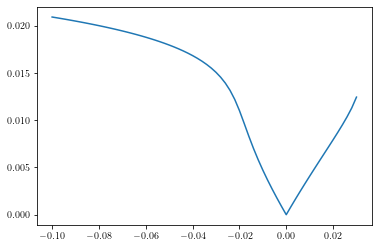

In [15]:
fig,axs = plt.subplots()
axs.plot(del_list_11,ve_list_11)

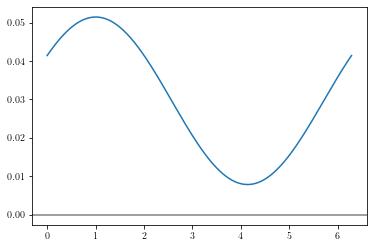

In [42]:
eps = .01
x = np.linspace(0,2*np.pi,10000)
h = ct_redu(0,x,eps,system11a,.033)

fig,axs = plt.subplots()
axs.axhline(0,0,2*np.pi,color='gray')
axs.plot(x,h)

# Tongue 1:2

## Load response and coupling functions

In [15]:
system12a = rsp(pardict=copy.deepcopy(pd1),**copy.deepcopy(kws1))
system12b = rsp(pardict=copy.deepcopy(pd2),**copy.deepcopy(kws2))

* Loading LC data...
* Loading monodromy...
* Floquet Exponent kappa =-0.02999999999993149
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...


In [16]:
a = nmc(system12a,system12b,
        recompute_list=['p_cglf0','h_cglf0','p_data_cglf0','h_data_cglf0'],
        #recompute_list=recompute_list,
        _n=('om0',1),_m=('om1',2),
        NP=300,NH=300)

* Computing p symbolic...
* Computing p...
* Computing p...
* Computing p...
* Computing p...
* Computing p...
* Computing p...
* Computing H symbolic...
* Computing H cglf0, order=0...
* Computing H cglf0, order=1...
* Computing H cglf0, order=2...
* Computing H cglf0, order=3...
* Computing H cglf0, order=4...
* Computing H cglf0, order=5...


In [17]:
d1 = np.linspace(-10,-1,20,endpoint=False)

del_list_12a,ve_list_12a = get_tongue(10**d1,system12a,deps=.002)
del_list_12b,ve_list_12b = get_tongue(-10**d1,system12a,deps=.002)

1.0      
1.0      


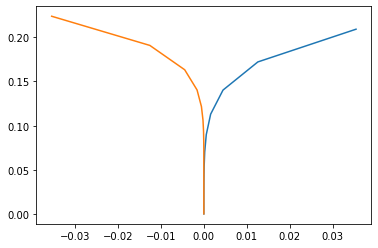

In [18]:
fig,axs = plt.subplots()
axs.plot(del_list_12a,ve_list_12a)
axs.plot(del_list_12b,ve_list_12b)
#axs.set_xscale('symlog')

# Tongue 2:3

## Load coupling functions

In [19]:
system23a = rsp(pardict=copy.deepcopy(pd1),**copy.deepcopy(kws1))
system23b = rsp(pardict=copy.deepcopy(pd2),**copy.deepcopy(kws2))

* Loading LC data...
* Loading monodromy...
* Floquet Exponent kappa =-0.02999999999993149
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...


In [20]:
a = nmc(system23a,system23b,
        #recompute_list=['p_cglf0','h_cglf0','p_data_cglf0','h_data_cglf0'],
        #recompute_list=recompute_list,
        _n=('om0',2),_m=('om1',3),
        NP=300,NH=300)

* Computing p symbolic...
* Computing p...
* Computing p...
* Computing p...
* Computing p...
* Computing p...
* Computing p...
* Computing H symbolic...
* Computing H cglf0, order=0...
* Computing H cglf0, order=1...
* Computing H cglf0, order=2...
* Computing H cglf0, order=3...
* Computing H cglf0, order=4...
* Computing H cglf0, order=5...


In [72]:
d1 = np.linspace(-10,-1,30,endpoint=False)
#dtemp = np.linspace(-1e-3,1e-3,31)

del_list_23a,ve_list_23a = get_tongue(10**d1,system23a,deps=.003,max_eps=1)
del_list_23b,ve_list_23b = get_tongue(-10**d1,system23a,deps=.003,max_eps=1)

1.0      
1.0      


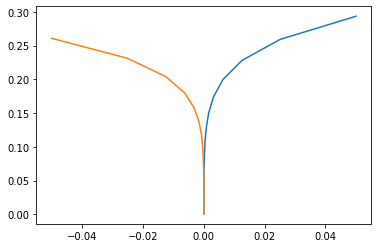

In [73]:
fig,axs = plt.subplots()
axs.plot(del_list_23a,ve_list_23a)
axs.plot(del_list_23b,ve_list_23b)
#axs.set_xscale('symlog')
#axs.set_xscale('log')

# Tongue 1:3

## Load coupling functions

In [23]:
system13a = rsp(pardict=copy.deepcopy(pd1),**copy.deepcopy(kws1))
system13b = rsp(pardict=copy.deepcopy(pd2),**copy.deepcopy(kws2))

* Loading LC data...
* Loading monodromy...
* Floquet Exponent kappa =-0.02999999999993149
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...


In [35]:
a = nmc(system13a,system13b,
        #recompute_list=['p_cglf0','h_cglf0','p_data_cglf0','h_data_cglf0'],
        #recompute_list=recompute_list,
        _n=('om0',1),_m=('om1',3),
        NP=500,NH=500)

* Loading p symbolic...
* Computing p...
* Computing p...
* Computing p...
* Computing p...
* Computing p...
* Computing p...
* Loading H symbolic...
* Computing H cglf0, order=0...
* Computing H cglf0, order=1...
* Computing H cglf0, order=2...
* Computing H cglf0, order=3...
* Computing H cglf0, order=4...
* Computing H cglf0, order=5...


In [67]:
d1 = np.linspace(-10,-1,20,endpoint=False)
#dtemp = np.linspace(-1e-3,1e-3,31)

del_list_13a,ve_list_13a = get_tongue(10**d1,system13a,deps=.01,max_eps=1)
del_list_13b,ve_list_13b = get_tongue(-10**d1,system13a,deps=.01,max_eps=1)

1.0      
1.0      


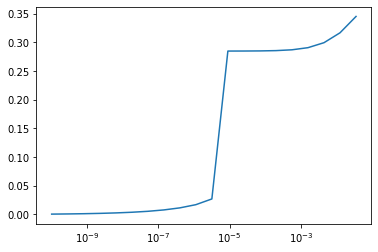

In [74]:
fig,axs = plt.subplots()
axs.plot(del_list_13a,ve_list_13a)
#axs.plot(del_list_13b,ve_list_13b)
#axs.set_xscale('symlog')
axs.set_xscale('log')
#axs.set_xlim(4e-6,2e-5)

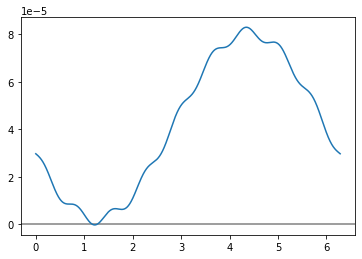

In [84]:
eps = .05
x = np.linspace(0,2*np.pi,100000)
h = ct_redu(0,x,eps,system13a,1e-6)

fig,axs = plt.subplots()
axs.axhline(0,0,2*np.pi,color='gray')
axs.plot(x,h)

# Plot

In [96]:
import matplotlib

In [7]:
cmap = matplotlib.colormaps['viridis']
fsize = 12

fig,axs = plt.subplots(figsize=(8,3))

axs.plot(del_list_13a+1/3,ve_list_13a,color=cmap(0),label='1:3',ls='-.')
axs.plot(del_list_13b+1/3,ve_list_13b,color=cmap(0),ls='-.')

axs.plot(del_list_12a+1/2,ve_list_12a,color=cmap(.2),label='1:2',ls='--')
axs.plot(del_list_12b+1/2,ve_list_12b,color=cmap(.2),ls='--')

axs.plot(del_list_23a+2/3,ve_list_23a,color=cmap(.4),label='2:3',ls=':')
axs.plot(del_list_23b+2/3,ve_list_23b,color=cmap(.4),ls=':')

axs.plot(del_list_11+1,ve_list_11,label='1:1',color=cmap(.6))

axs.set_ylim(0,.35)

#axs.set_yscale('log')
axs.set_xlabel(r'$\omega_X/(\omega_f+\delta)$',fontsize=fsize)
axs.set_ylabel(r'$\varepsilon$',fontsize=fsize)

axs.set_xticks([1/3,1/2,2/3,1])
axs.set_xticklabels(['$1{:}3$','$1{:}2$','$2{:}3$','$1{:}1$'],fontsize=fsize)

plt.savefig('../')

NameError: name 'matplotlib' is not defined